# Diabetes

## IMPORT DATA & MODULE

In [ ]:
# To check if GPU is active
# from tensorflow.python.client import device_lib

# Load Data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualisation
import matplotlib.pyplot as plt

In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data

--2023-11-27 10:44:42--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-11-27 10:44:42 (86.7 MB/s) - ‘helper_functions.py’ saved [11485/11485]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

## EXPLORATORY DATA ANALYSIS

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Cek Missing Data

In [ ]:
data_missing = df.isnull().sum()
data_missing

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

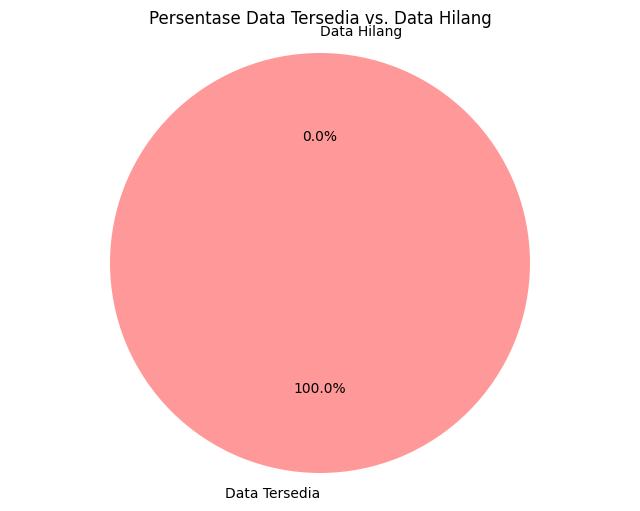

In [ ]:
# Hitung jumlah total data yang hilang
total_missing = df.isnull().sum().sum()

# Hitung jumlah total data yang tersedia
total_data = df.size

# Hitung jumlah data yang tersedia
available_data = total_data - total_missing

# Buat data untuk pie chart
labels = ['Data Tersedia', 'Data Hilang']
sizes = [available_data, total_missing]
colors = ['#ff9999','#66b3ff']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Persentase Data Tersedia vs. Data Hilang')
plt.axis('equal')  # Agar lingkaran terlihat sempurna

# Tampilkan pie chart
plt.show()

### Cek Balance Data

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

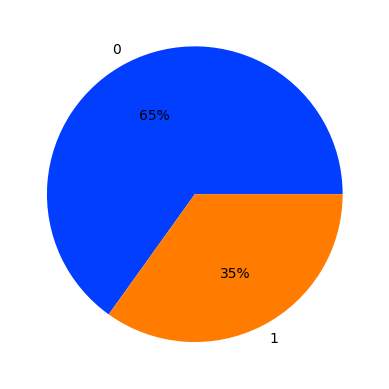

In [ ]:
# declaring data
data = df["Outcome"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=data.index, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

### Cek Outlier

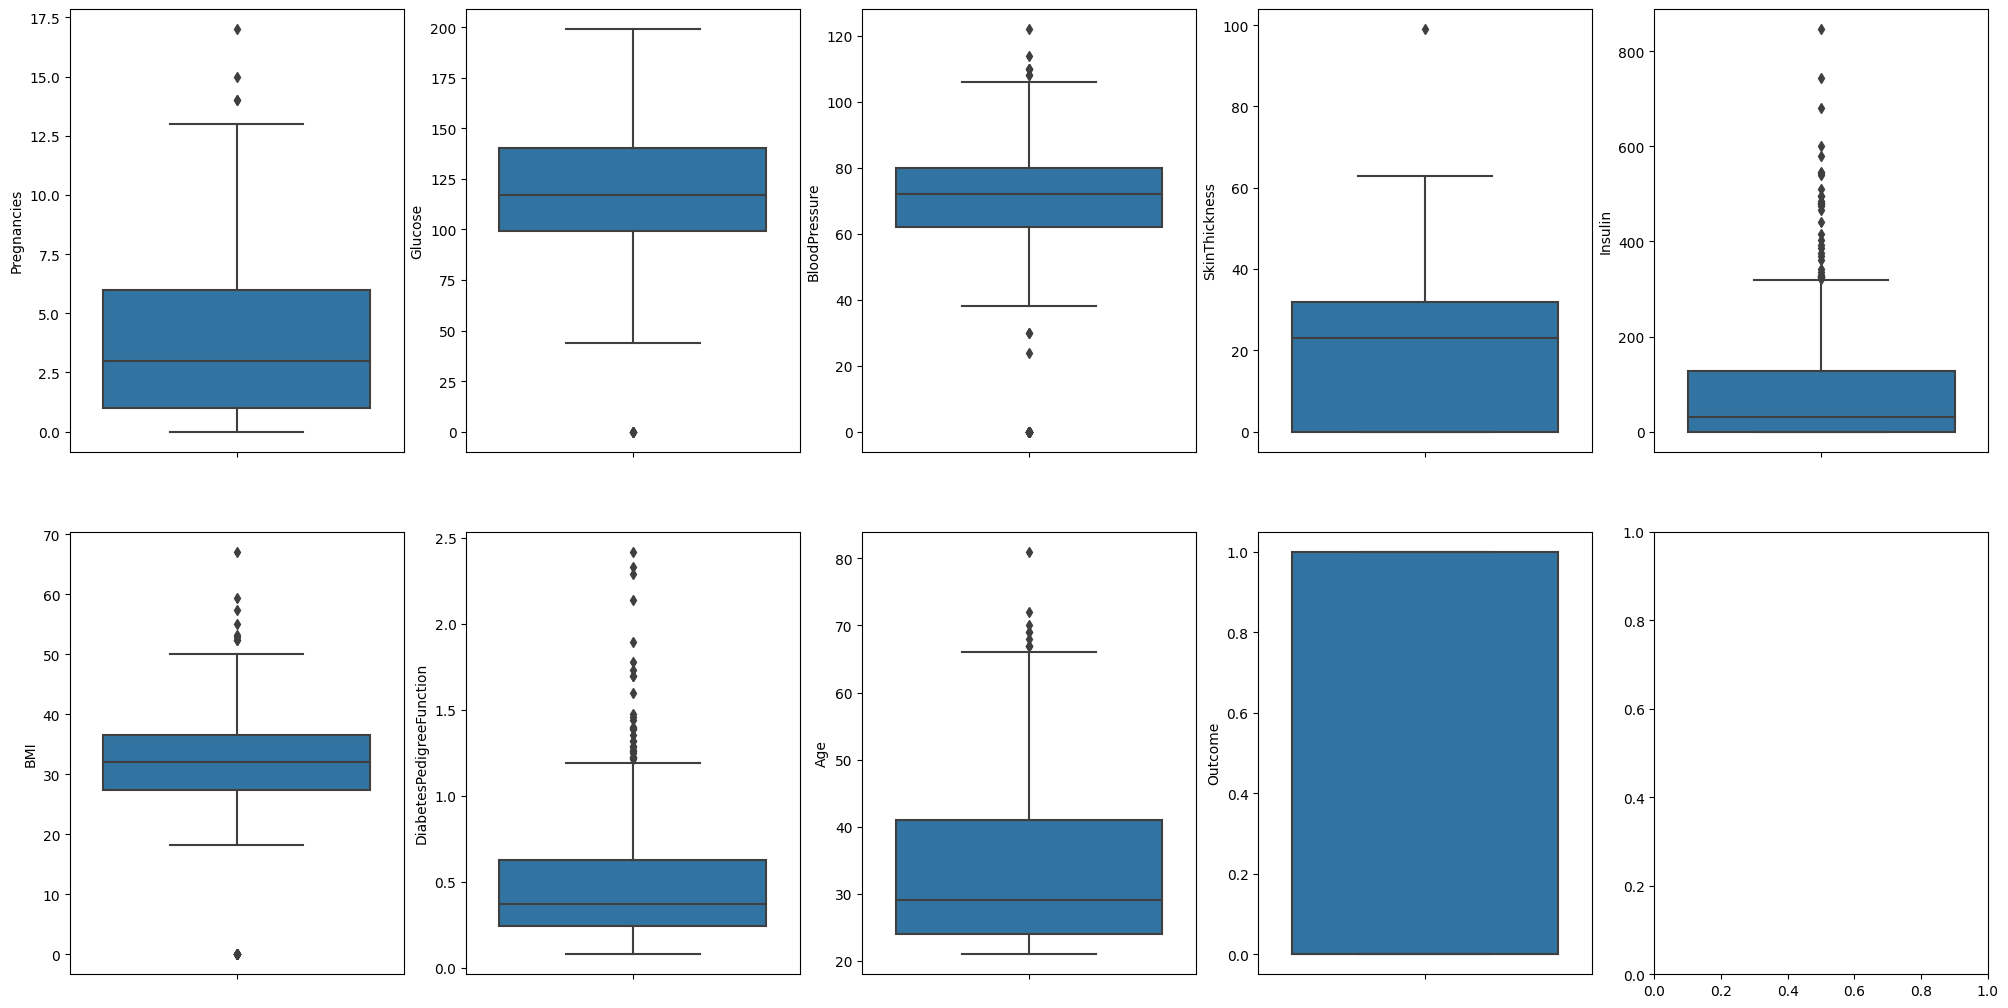

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Modelling

### Preprocessing

#### Menghapus Outlier

In [ ]:
# Mengecek dan menghapus outlier di semua kolom kecuali kolom 'label'
numerical_cols = df.columns[:-1]  # Mengambil semua kolom kecuali kolom terakhir
num_plots = len(numerical_cols)

# Visualisasi boxplot untuk setiap kolom numerik dan menghapus outlier
for i, col in enumerate(numerical_cols):
    # Mengecek outlier dengan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
df.shape

(636, 9)

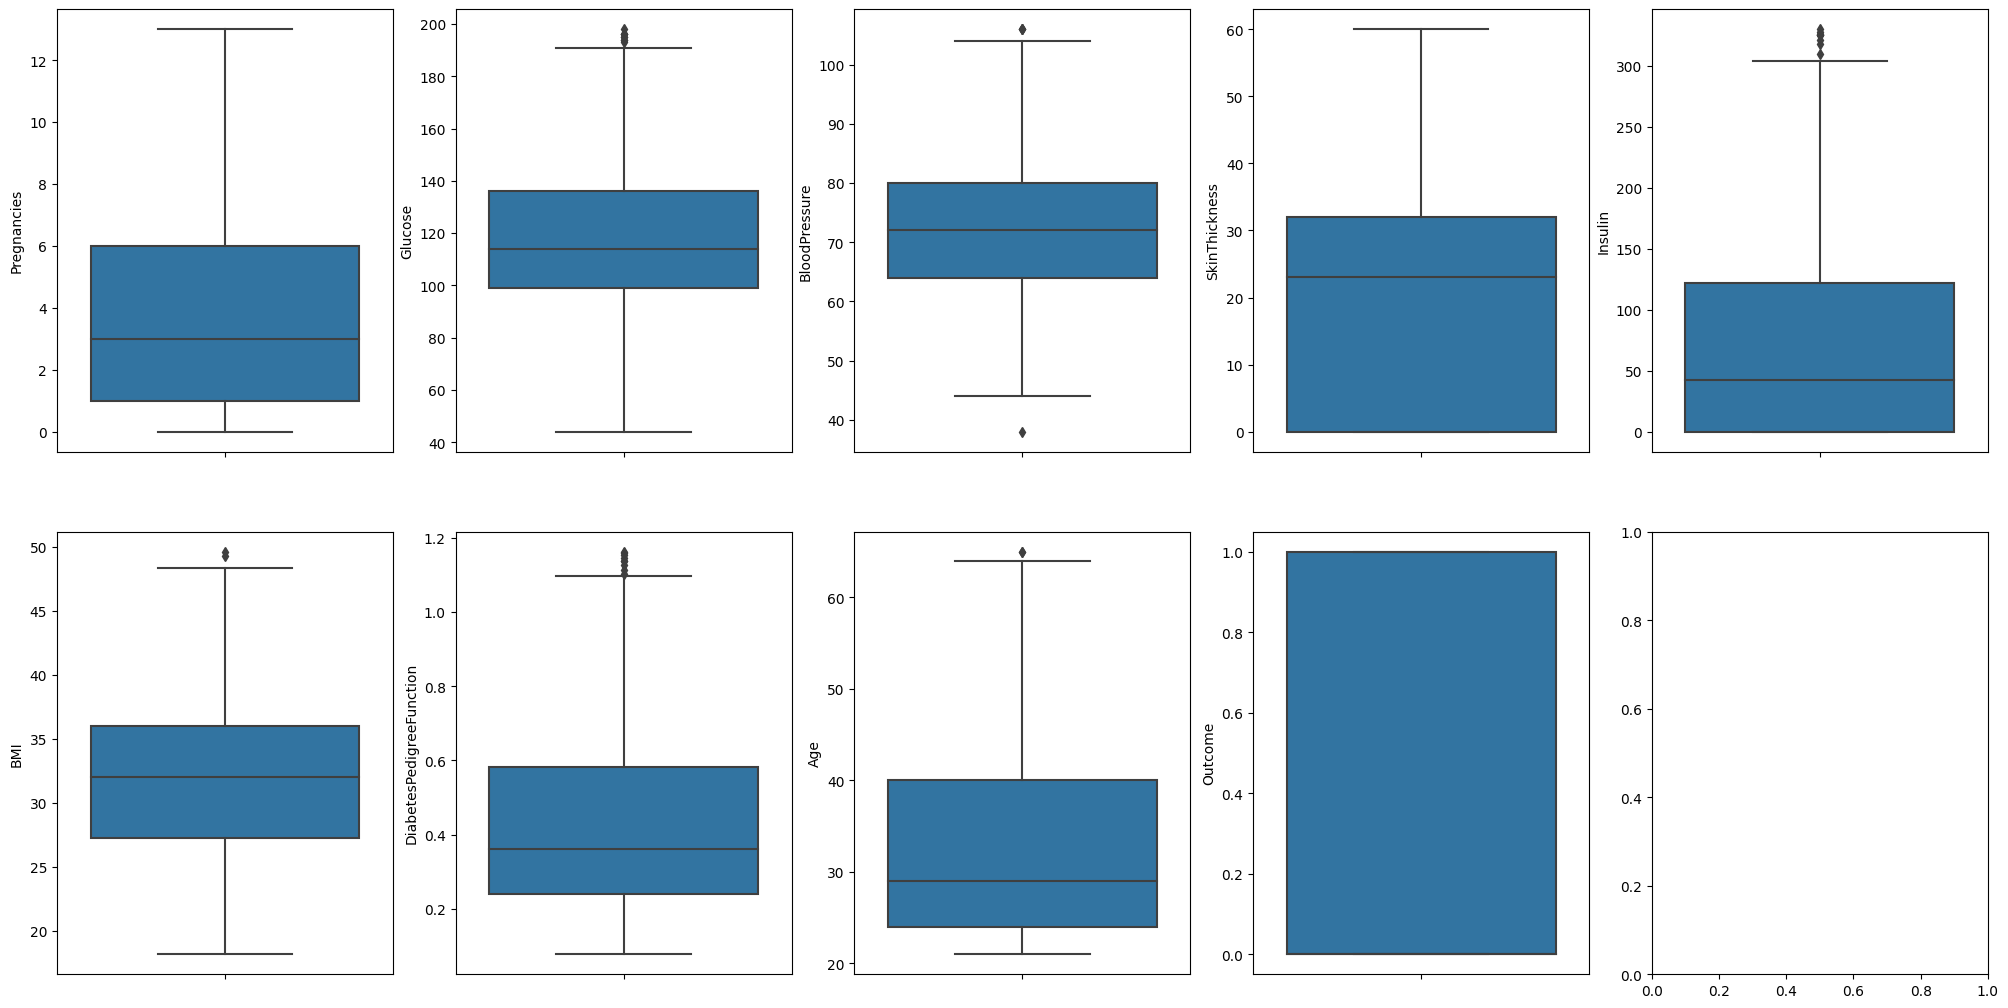

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Balancing Data

In [ ]:
# Hitung jumlah data dengan label target 0 dan 1
count_class_0, count_class_1 = df['Outcome'].value_counts()

# Pisahkan data berdasarkan label target
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

# Oversampling data dengan label target 0
df_class_0_oversampled = df_class_0.sample(count_class_1, replace=True, random_state=42)

# Gabungkan data oversampled dengan data label target 1
df_balanced = pd.concat([df_class_0_oversampled, df_class_1], axis=0)

# Shuffle data untuk memastikan urutan acak
df = df_balanced.sample(frac=1, random_state=42)

# Hasil data yang sudah seimbang
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
470,1,144,82,40,0,41.3,0.607,28,0
301,2,144,58,33,135,31.6,0.422,25,1
198,4,109,64,44,99,34.8,0.905,26,1
35,4,103,60,33,192,24.0,0.966,33,0
754,8,154,78,32,0,32.4,0.443,45,1
...,...,...,...,...,...,...,...,...,...
94,2,142,82,18,64,24.7,0.761,21,0
82,7,83,78,26,71,29.3,0.767,36,0
283,7,161,86,0,0,30.4,0.165,47,1
598,1,173,74,0,0,36.8,0.088,38,1


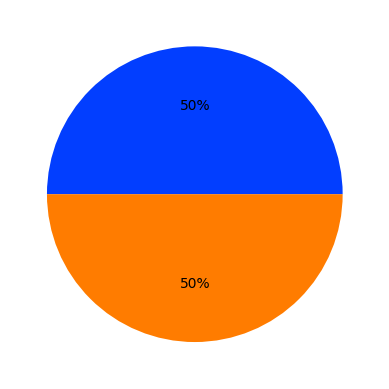

In [ ]:
# declaring data
data = df["Outcome"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

### KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7226890756302521

In [ ]:
confusion_matrix(y_test,y_pred)

array([[40, 15],
       [18, 46]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        55
           1       0.75      0.72      0.74        64

    accuracy                           0.72       119
   macro avg       0.72      0.72      0.72       119
weighted avg       0.72      0.72      0.72       119



#### Elbow

In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

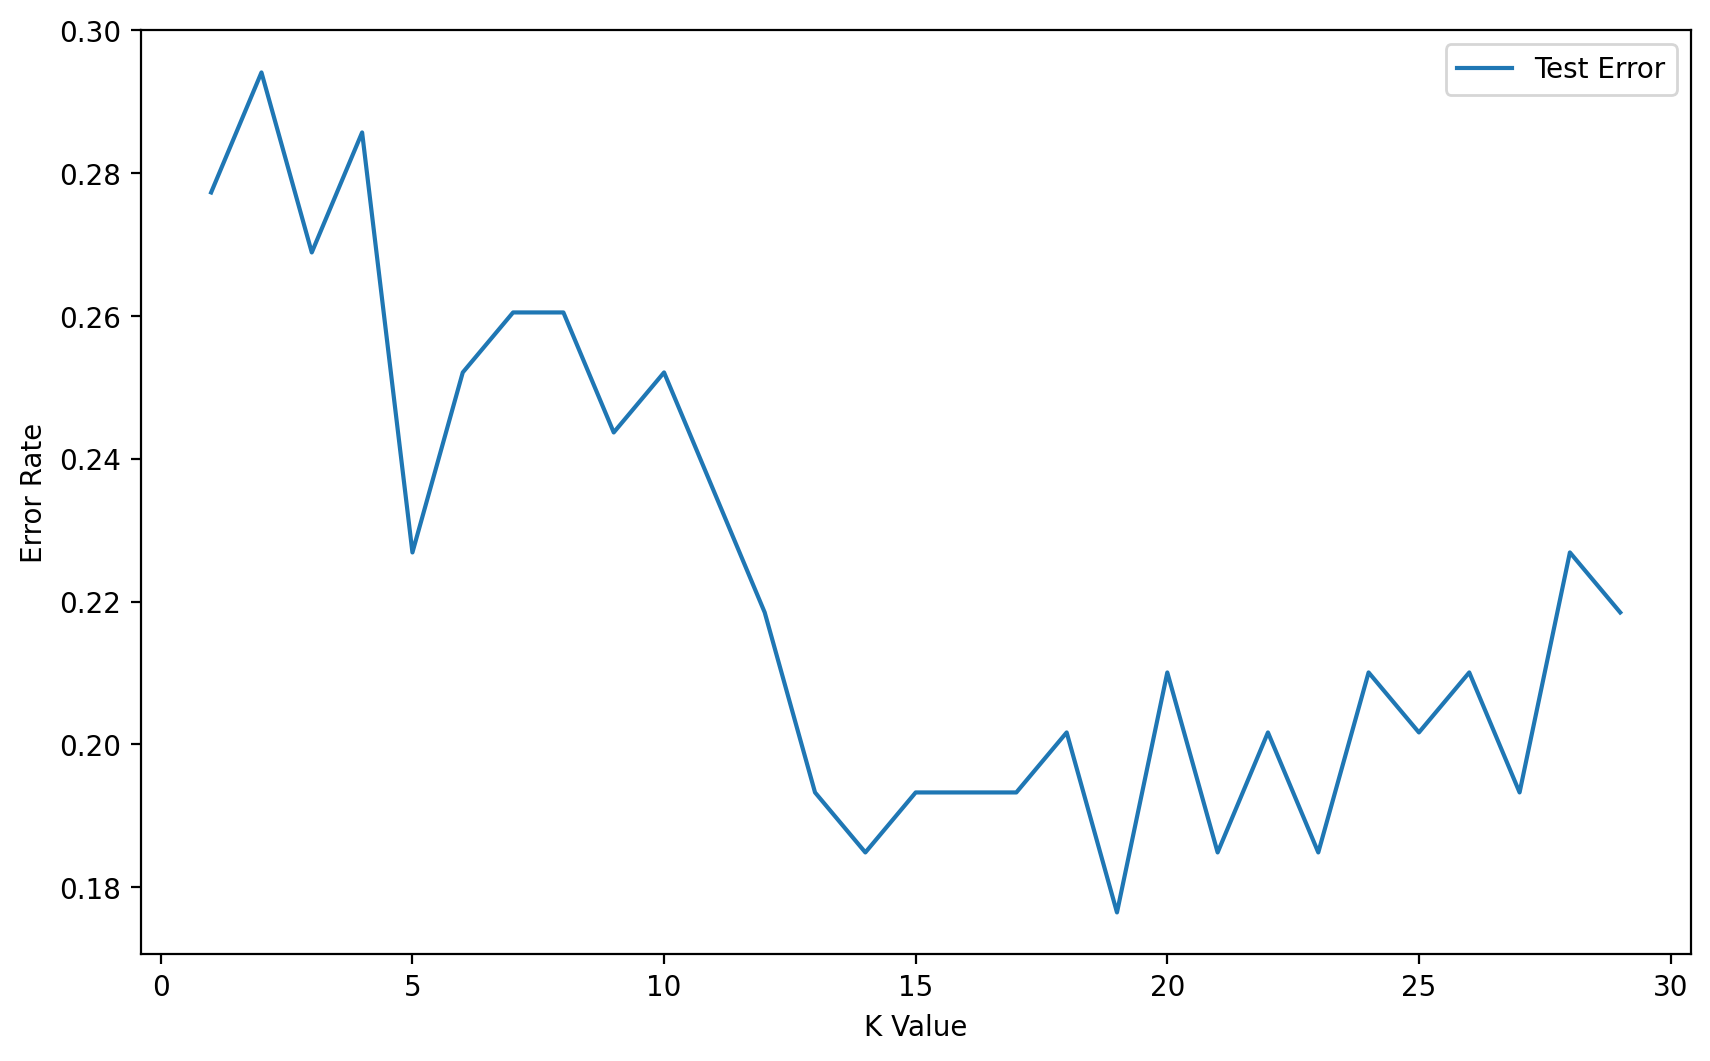

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

#### GridSearch CV

In [ ]:
scaler = StandardScaler()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [ ]:
k_values = list(range(1,20))

In [ ]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
param_grid = {'knn__n_neighbors': k_values}

In [ ]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [ ]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=15))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=15),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Let's check our understanding:
**How many total runs did we do?**

#### Final Model KNN

We just saw that our  GridSearch recommends a K=15 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [ ]:
scaler = StandardScaler()
knn19 = KNeighborsClassifier(n_neighbors=19)
operations = [('scaler',scaler),('knn19',knn19)]

In [ ]:
pipe = Pipeline(operations)

In [ ]:
import time

# Mulai mengukur waktu
start_time = time.time()

pipe.fit(X_train,y_train)

# Selesai mengukur waktu
end_time = time.time()

# Hitung durasi pelatihan (meskipun KNN sebenarnya tidak melakukan pelatihan)
durationKNN = end_time - start_time
print(f"Durasi pelatihan: {durationKNN} detik")

Durasi pelatihan: 0.009696483612060547 detik


In [ ]:
pipe_pred = pipe.predict(X_test)

In [ ]:
accuracy_score(y_test,pipe_pred)

0.8235294117647058

In [ ]:
import time

# Mulai mengukur waktu
start_time = time.time()

pipe_pred = pipe.predict(X_test)

# Selesai mengukur waktu
end_time = time.time()

# Hitung durasi pelatihan (meskipun KNN sebenarnya tidak melakukan pelatihan)
durationKNNtest = end_time - start_time
print(f"Durasi pelatihan: {durationKNN} detik")

Durasi pelatihan: 0.009696483612060547 detik


In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        55
           1       0.79      0.91      0.85        64

    accuracy                           0.82       119
   macro avg       0.83      0.82      0.82       119
weighted avg       0.83      0.82      0.82       119



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracyKNN = accuracy_score(y_test,pipe_pred)
precisionKNN = precision_score(y_test, pipe_pred)
recallKNN = recall_score(y_test, pipe_pred)
f1KNN = f1_score(y_test, pipe_pred)

print("Akurasi: {:.2f}".format(accuracyKNN))
print("Presisi: {:.2f}".format(precisionKNN))
print("Recall: {:.2f}".format(recallKNN))
print("F1-Score: {:.2f}".format(f1KNN))

Akurasi: 0.82
Presisi: 0.79
Recall: 0.91
F1-Score: 0.85


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()

import time

# Mulai mengukur waktu
start_time = time.time()

gaussian.fit(X_train, y_train)

# Selesai mengukur waktu
end_time = time.time()

# Hitung durasi pelatihan (meskipun KNN sebenarnya tidak melakukan pelatihan)
durationNaiveBayes = end_time - start_time
print(f"Durasi pelatihan: {durationNaiveBayes} detik")

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

Durasi pelatihan: 0.003712177276611328 detik


71.27

In [ ]:
import time

# Mulai mengukur waktu
start_time = time.time()

Y_pred = gaussian.predict(X_test)

# Selesai mengukur waktu
end_time = time.time()

# Hitung durasi pelatihan (meskipun KNN sebenarnya tidak melakukan pelatihan)
durationNaiveBayestest = end_time - start_time
print(f"Durasi pelatihan: {durationKNN} detik")

Durasi pelatihan: 0.009696483612060547 detik


In [ ]:
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

71.27

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        55
           1       0.75      0.72      0.74        64

    accuracy                           0.72       119
   macro avg       0.72      0.72      0.72       119
weighted avg       0.72      0.72      0.72       119



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracyNB = accuracy_score(y_test,y_pred)
precisionNB = precision_score(y_test, y_pred)
recallNB = recall_score(y_test, y_pred)
f1NB = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracyNB))
print("Presisi: {:.2f}".format(precisionNB))
print("Recall: {:.2f}".format(recallNB))
print("F1-Score: {:.2f}".format(f1NB))

Akurasi: 0.72
Presisi: 0.75
Recall: 0.72
F1-Score: 0.74


## Perbandingan Model

In [ ]:
# Membuat data
data = {'Nama_Model': ['K-Nearest Neighbors ', 'Naive Bayes'],
        'Akurasi': [accuracyKNN, accuracyNB],
        'Presisi': [precisionKNN, precisionNB],
        'Recall': [recallKNN, recallNB],
        'f1': [f1KNN, f1NB],
        'Waktu Komputasi' : [durationKNN, durationNaiveBayes],
        'Waktu Komputasi Testing' : [durationKNNtest, durationNaiveBayestest]}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

df

,Nama_Model,Akurasi,Presisi,Recall,f1,Waktu Komputasi,Waktu Komputasi Testing
0,K-Nearest Neighbors,0.823529,0.794521,0.90625,0.846715,0.009696,0.016651
1,Naive Bayes,0.722689,0.754098,0.71875,0.736000,0.003712,0.002761


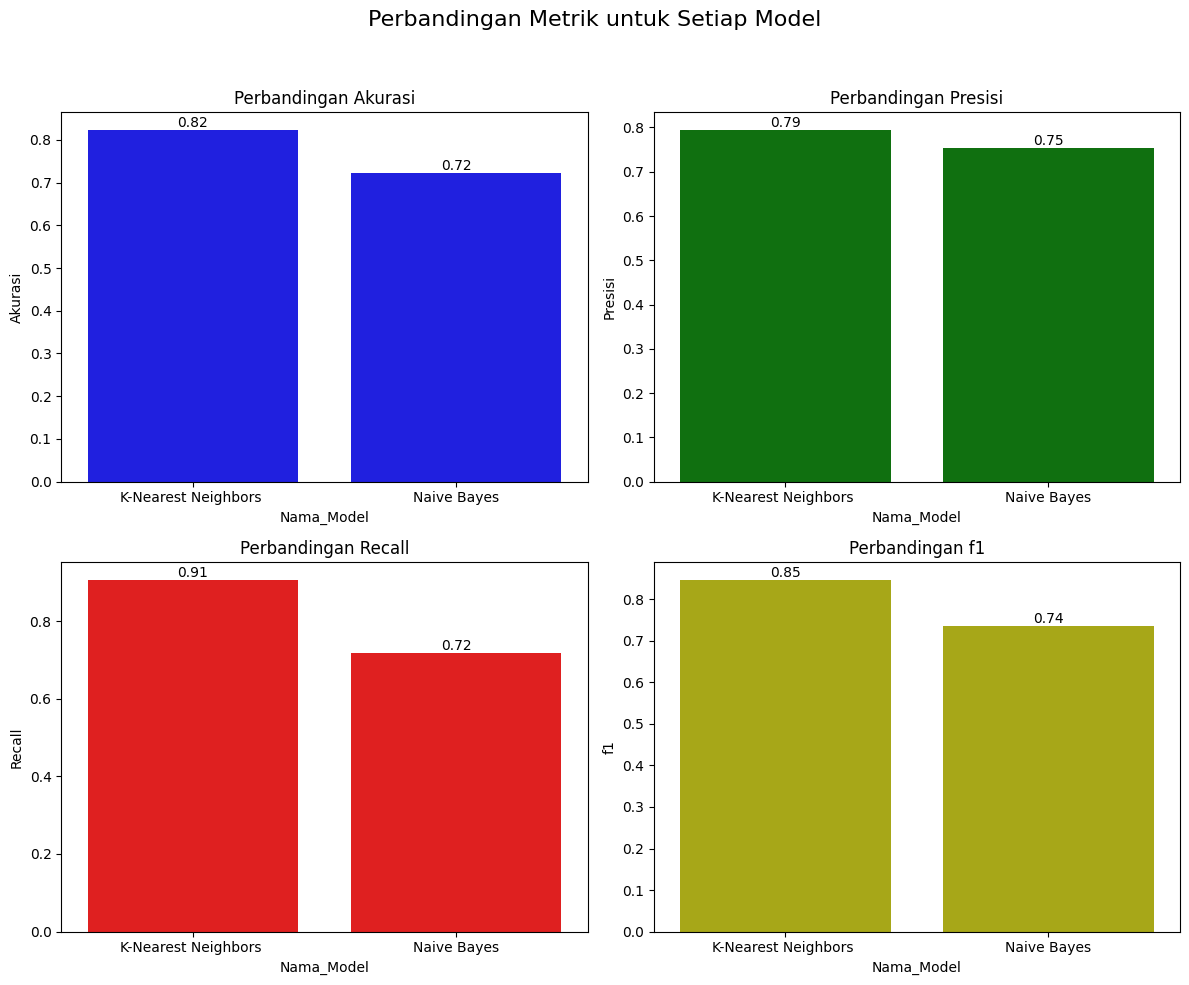

In [ ]:
# Mengurutkan masing-masing variabel (kolom) dari yang terbesar ke terkecil
df_sorted = df
# Membuat subplot utama
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Perbandingan Metrik untuk Setiap Model", fontsize=16)

# Bagian 1: Perbandingan Akurasi
sns.barplot(data=df_sorted, x="Nama_Model", y="Akurasi", ax=axes[0, 0], color="b")
axes[0, 0].set_title("Perbandingan Akurasi")
for i, v in enumerate(df_sorted["Akurasi"]):
    axes[0, 0].text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Bagian 2: Perbandingan Presisi
sns.barplot(data=df_sorted, x="Nama_Model", y="Presisi", ax=axes[0, 1], color="g")
axes[0, 1].set_title("Perbandingan Presisi")
for i, v in enumerate(df_sorted["Presisi"]):
    axes[0, 1].text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Bagian 3: Perbandingan Recall
sns.barplot(data=df_sorted, x="Nama_Model", y="Recall", ax=axes[1, 0], color="r")
axes[1, 0].set_title("Perbandingan Recall")
for i, v in enumerate(df_sorted["Recall"]):
    axes[1, 0].text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Bagian 4: Perbandingan f1
sns.barplot(data=df_sorted, x="Nama_Model", y="f1", ax=axes[1, 1], color="y")
axes[1, 1].set_title("Perbandingan f1")
for i, v in enumerate(df_sorted["f1"]):
    axes[1, 1].text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Menampilkan plot
plt.show()

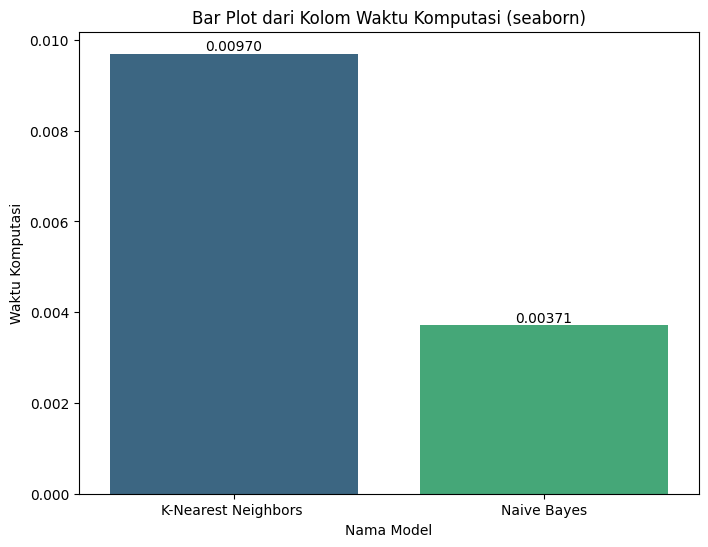

In [ ]:
# Menggunakan seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Nama_Model', y='Waktu Komputasi', data=df, palette='viridis')
# Menambahkan nilai pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Nama Model')
plt.ylabel('Waktu Komputasi')
plt.title(f'Bar Plot dari Kolom Waktu Komputasi (seaborn)')
plt.show()